<a href="https://colab.research.google.com/github/ruchiraravishankar/level-5-project/blob/main/iam_dataset_binary_classifier_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import torch
import glob
import os
import pickle
from bs4 import BeautifulSoup
# data_path = '/Users/ruchiraravishankar/Downloads/iam_dataset/'
data_path = '/content/drive/MyDrive/iam_dataset/'

# print(glob.glob(data_path))

In [ ]:
b_file = open("/content/drive/MyDrive/iam_dataset/d_i.pkl", "rb")
d_i = pickle.load(b_file)
print(d_i)

{'e01-062': '213', 'e01-059': '213', 'e01-086': '214', 'e01-092': '215', 'e01-102': '215', 'e01-113': '216', 'e01-107': '216', 'e02-014': '219', 'e01-119': '217', 'e02-000': '218', 'e02-018': '220', 'e02-021': '221', 'e02-025': '222', 'e02-074': '223', 'e02-082': '224', 'e02-086': '225', 'e02-091': '226', 'e02-094': '227', 'e02-100': '228', 'e02-117': '229', 'e04-000': '158', 'e04-008': '230', 'e04-011': '231', 'e04-004': '230', 'e04-015': '231', 'e04-022': '232', 'e04-019': '232', 'e04-026': '233', 'e04-030': '233', 'e04-038': '234', 'e04-034': '234', 'e04-052': '235', 'e04-043': '235', 'e04-058': '236', 'e04-062': '237', 'e04-079': '238', 'e04-068': '237', 'e04-083': '239', 'e04-086': '240', 'e04-091': '241', 'e04-095': '241', 'e04-109': '242', 'e04-103': '242', 'e04-099': '241', 'e04-114': '242', 'e04-119': '243', 'e04-124': '243', 'e04-127': '243', 'e04-132': '241', 'e06-000': '206', 'e06-006': '202', 'e06-003': '204', 'e06-021': '206', 'e06-010': '203', 'e06-015': '204', 'e06-030'

In [ ]:
form_writer_list = list(d_i.items())

In [ ]:
from collections import Counter

top_writers = []
num_writers = 50 # taking the top 50 writers
writers_counter = Counter(d_i.values())
for writer_id,_ in writers_counter.most_common(num_writers):
    top_writers.append(writer_id)

print(top_writers)

['000', '384', '551', '552', '588', '635', '670', '671', '152', '150', '151', '154', '153', '333', '334', '336', '337', '338', '339', '340', '341', '342', '343', '345', '344', '347', '346', '348', '349', '634', '155', '332', '335', '315', '118', '415', '209', '085', '567', '206', '202', '204', '203', '205', '207', '208', '247', '248', '273', '274']


In [ ]:
top_forms = []
for form_id, author_id in d_i.items():
    if author_id in top_writers:
        top_forms.append(form_id)
print(top_forms)

['e06-000', 'e06-006', 'e06-003', 'e06-021', 'e06-010', 'e06-015', 'e06-030', 'e06-026', 'e06-033', 'e06-037', 'e06-046', 'e06-041', 'e06-053', 'e06-049', 'e07-000', 'e06-070', 'e07-079', 'e07-076', 'e07-086', 'e07-083', 'e07-090', 'e07-094', 'e07-105', 'e07-098', 'e07-101', 'e07-108', 'f04-007', 'f04-020', 'g03-049', 'g04-007', 'g04-011', 'g04-014', 'g04-017', 'g04-026', 'g04-032', 'g04-095', 'g06-011a', 'g05-098', 'g06-011b', 'g06-011c', 'g06-011e', 'g06-011f', 'g06-011g', 'g06-011h', 'g06-011i', 'g06-011j', 'g06-011k', 'g06-011l', 'g06-011n', 'g06-011m', 'g06-011p', 'g06-011o', 'g06-018a', 'g06-011r', 'g06-018c', 'g06-018d', 'g06-018b', 'g06-018g', 'g06-018f', 'g06-018e', 'g06-018h', 'g06-018i', 'g06-018l', 'g06-018j', 'g06-018k', 'g06-018n', 'g06-018m', 'g06-018o', 'g06-018p', 'g06-018r', 'g06-026b', 'g06-026a', 'g06-026e', 'g06-026d', 'g06-026c', 'g06-026g', 'g06-026f', 'g06-026i', 'g06-026h', 'g06-026j', 'g06-026l', 'g06-026k', 'g06-026o', 'g06-026m', 'g06-026n', 'g06-026r', 'g06

In [ ]:
import os
import glob
import shutil

# Create temp directory to save writers' forms in (assumes files have already been copied if the directory exists)
temp_sentences_path = data_path + "/temp_sentences"
if not os.path.exists(temp_sentences_path):
    os.makedirs(temp_sentences_path)
    # Copy forms that belong to the top 50 most common writers to the temp directory
    original_sentences_path = data_path + "/sentences/**/**/*.png"
    for file_path in glob.glob(original_sentences_path):
        image_name = file_path.split('/')[-1]  
        file_name, _ = os.path.splitext(image_name)
        form_id = '-'.join(file_name.split('-')[0:2])
        if form_id in top_forms:
            shutil.copy2(file_path, temp_sentences_path + "/" + image_name)

In [ ]:
img_files = np.zeros((0), dtype=str)
print(img_files)
img_targets = np.zeros((0), dtype=str)
print(img_targets)
sentence_dict = {}
path_to_files = os.path.join(temp_sentences_path, '*')
for file_path in glob.glob(path_to_files):
    img_files = np.append(img_files, file_path)
    file_name, _ = os.path.splitext(file_path.split('/')[-1]  )
    form_id = '-'.join(file_name.split('-')[0:2])
    for key in d_i:
        if key == form_id:
            img_targets = np.append(img_targets, d_i[form_id])
#             sentence_dict[d_i[form_id]] = form_id

[]
[]


In [ ]:
print(img_files.shape)
print(img_targets.shape)

print(Counter(img_targets).keys())
print(Counter(img_targets).values())

(4901,)
(4901,)
dict_keys(['551', '552', '567', '315', '588', '634', '635', '670', '671', '340', '339', '341', '342', '343', '344', '345', '346', '347', '348', '332', '333', '334', '335', '336', '337', '338', '349', '274', '118', '384', '415', '247', '248', '273', '150', '151', '152', '153', '154', '155', '202', '203', '204', '205', '206', '207', '208', '209', '085', '000'])
dict_values([129, 127, 87, 73, 133, 134, 95, 116, 129, 83, 91, 101, 95, 81, 99, 107, 105, 86, 87, 82, 104, 89, 71, 82, 75, 80, 84, 45, 52, 117, 87, 60, 54, 45, 104, 99, 101, 111, 108, 95, 63, 43, 60, 55, 50, 56, 53, 71, 54, 693])


In [ ]:
sen_dict = {}

for i in range(len(img_targets)):
    if img_targets[i] not in sen_dict.keys():
        sen_dict[img_targets[i]] = [img_files[i]]
    else:
        sen_dict[img_targets[i]].append(img_files[i])

In [ ]:
# print(len(sen_dict.values()))
number_of = []
writer_ids = []
for key, value in sorted(sen_dict.items()):
    writer_ids.append(key)
    number_of.append(len([item for item in value if item]))
print(len(writer_ids))


50


In [ ]:
labelled_data = np.stack([img_files, img_targets], axis=1)

print(labelled_data.shape)

(4901, 2)


In [ ]:
from sklearn.utils import shuffle
from PIL import Image
import random

CROP_SIZE = 113
NUM_LABELS = 50

def get_augmented_sample(sample, label, sample_ratio):
    # Get current image details
    img = Image.open(sample)
    img_width = img.size[0]
    img_height = img.size[1]

    # Compute resize dimensions such that aspect ratio is maintained
    height_fac = CROP_SIZE / img_height
    size = (int(img_width * height_fac), CROP_SIZE)

    # Resize image 
    new_img = img.resize((size), Image.ANTIALIAS)
    new_img_width = new_img.size[0]
    new_img_height = new_img.size[1]

    # Generate a random number of crops of size 113x113 from the resized image
    x_coord = list(range(0, new_img_width - CROP_SIZE))
    num_crops = int(len(x_coord) * sample_ratio)
    random_x_coord = random.sample(x_coord, num_crops)
    
    # Create augmented images (cropped forms) and map them to a label (writer)
    images = []
    labels = []
    for x in random_x_coord:
        img_crop = new_img.crop((x, 0, x + CROP_SIZE, CROP_SIZE))
        # Transform image to an array of numbers
        images.append(np.asarray(img_crop))
        labels.append(label)

    return images, labels

In [ ]:
transformed, labels = get_augmented_sample(labelled_data[0,0], labelled_data[0,1],0.05)

In [ ]:
print(len(transformed))

5


In [ ]:
196*2+3

395

In [ ]:
labelled_data_0 = labelled_data[labelled_data[:,1] == '000']

print(labelled_data_0.shape)

labelled_data_0 = labelled_data_0[:196] # different set of data to the one that its originally trained on
print(labelled_data_0.shape)

print(np.unique(labelled_data_0[:,1]))

(693, 2)
(196, 2)
['000']


In [ ]:
# writer_list = list(sen_dict.keys())

# print(np.array(writer_list).shape)

# print(writer_list)

In [ ]:
remove_000 = labelled_data[labelled_data[:,1]!='000']

print(np.unique(remove_000[:,1]))
print(np.unique(remove_000[:,1]).shape)

['085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346'
 '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670'
 '671']
(49,)


In [ ]:
y = [remove_000[remove_000[:,1]==k] for k in np.unique(remove_000[:,1])]
print(len(y))

49


In [ ]:
labelled_data_1 = []
for i in y:
    labelled_data_1.append(i[:4]) # different set of data to the one that its originally trained on
print(len(labelled_data_1))

labelled_data_1 = np.array(labelled_data_1)

print(labelled_data_1.shape)

49
(49, 4, 2)


In [ ]:
labelled_data_1=labelled_data_1.reshape(-1,2)

In [ ]:
print(labelled_data_1.shape)

(196, 2)


In [ ]:
print(np.unique(labelled_data_1[:,1]))

['085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346'
 '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670'
 '671']


In [ ]:
# print(labelled_data_1)

In [ ]:
labelled_data_new = np.concatenate((labelled_data_0, labelled_data_1))
np.random.shuffle(labelled_data_new)
print(labelled_data_new.shape) # mix of sentences from writer id 0 and others, labelled

(392, 2)


In [ ]:
# split before augmenting to ensure the sentences are being split and not the augmented samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(labelled_data_new[:,0], labelled_data_new[:,1], test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(262,) (130,) (262,) (130,)


In [ ]:
def augment(data, labels):
    augmented_sample_list = []
    augmented_label_list = []
    for i in range(len(data)):
        augmented_samples, augmented_labels = get_augmented_sample(data[i], labels[i],0.1)
        augmented_sample_list.append(augmented_samples)
        augmented_label_list.append(augmented_labels)
    return augmented_sample_list, augmented_label_list

In [ ]:
augsamps, auglbls = augment(X_train, y_train) # returns two lists of arrays
ausamps_test, auglbls_test = augment(X_test, y_test)

In [ ]:
import operator
from functools import reduce

# flattening the lists
aug_samps = reduce(operator.add, augsamps)
aug_lbls = reduce(operator.add, auglbls)

aug_samps_test = reduce(operator.add, ausamps_test)
aug_lbls_test = reduce(operator.add, auglbls_test)
print(len(aug_samps))
print(len(aug_lbls))

print(len(aug_samps_test))
print(len(aug_lbls_test))

39261
39261
20721
20721


In [ ]:
# converting lists to arrays
aug_samps_arr = np.array(aug_samps)
aug_lbls_arr = np.array(aug_lbls)
aug_samps_arr_test = np.array(aug_samps_test)
aug_lbls_arr_test = np.array(aug_lbls_test)

print(aug_samps_arr.shape)
print(aug_lbls_arr.shape)
print(aug_samps_arr_test.shape)
print(aug_lbls_arr_test.shape)

(39261, 113, 113)
(39261,)
(20721, 113, 113)
(20721,)


In [ ]:
X_train = aug_samps_arr
X_train = X_train.reshape(X_train.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_train = X_train.astype('float16')
# X_data /= 255
X_train /= 255.0
y_train = aug_lbls_arr


X_test = aug_samps_arr_test
X_test = X_test.reshape(X_test.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_test = X_test.astype('float16')
X_test /= 255.0
y_test = aug_lbls_arr_test



In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39261, 1, 113, 113)
(39261,)
(20721, 1, 113, 113)
(20721,)


In [ ]:
new = np.unique(y_train)
print(new)

y_train[y_train !='000'] = 1
new = np.unique(y_train)
print(new)

y_train[y_train=='000'] = 0
new = np.unique(y_train)
print(new)

print(y_train.shape)

y_train = y_train.astype('float16')

print(np.unique(y_train))

['000' '085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204'
 '205' '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333'
 '334' '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345'
 '346' '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635'
 '670' '671']
['000' '1']
['0' '1']
(39261,)
[0. 1.]


In [ ]:
new = np.unique(y_test)
print(new)

y_test[y_test !='000'] = 1
new = np.unique(y_test)
print(new)

y_test[y_test=='000'] = 0
new = np.unique(y_test)
print(new)

print(y_test.shape)

y_test = y_test.astype('float16')

print(np.unique(y_test))

['000' '085' '118' '150' '151' '152' '153' '155' '202' '203' '208' '209'
 '273' '274' '315' '332' '334' '336' '337' '338' '342' '343' '346' '347'
 '348' '349' '415' '551' '552' '567' '634' '635' '670']
['000' '1']
['0' '1']
(20721,)
[0. 1.]


In [ ]:
print(y_test[y_test==1.0].shape)

(7146,)


In [ ]:
torch.manual_seed(42)
CUDA = torch.cuda.is_available()

device = torch.device('cuda' if CUDA else 'cpu')
kwargs = {'num_workers': 1, 'pin_memory': True} if CUDA else {}
device

device(type='cuda')

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

if CUDA:
  tensor_x_train = torch.Tensor(X_train).type(torch.cuda.FloatTensor) # transform to torch tensor
  tensor_y_train = torch.Tensor(y_train).type(torch.cuda.FloatTensor).long()
else:
  tensor_x_train = torch.Tensor(X_train).type(torch.FloatTensor) # transform to torch tensor
  tensor_y_train = torch.Tensor(y_train).type(torch.FloatTensor).long()

train_dataset = TensorDataset(tensor_x_train,tensor_y_train) # create your datset
train_dataloader = DataLoader(train_dataset,batch_size=16, shuffle=True, drop_last=True) # create your dataloader

In [ ]:
if CUDA:
  tensor_x_test = torch.Tensor(X_test).type(torch.cuda.FloatTensor) # transform to torch tensor
  tensor_y_test = torch.Tensor(y_test).type(torch.cuda.FloatTensor).long()
else:
  tensor_x_test = torch.Tensor(X_test).type(torch.FloatTensor) # transform to torch tensor
  tensor_y_test = torch.Tensor(y_test).type(torch.FloatTensor).long()

test_dataset = TensorDataset(tensor_x_test,tensor_y_test) # create your datset
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, drop_last=True) # create your dataloader

In [ ]:
tensor_x_train.shape

torch.Size([39261, 1, 113, 113])

In [ ]:
from torch import nn
class Binary_Classifier(nn.Module): 
    def __init__(self):
        super(Binary_Classifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.conv3 = nn.Conv2d(20, 30, kernel_size=3)
        self.conv3_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(13520, 1024)
        self.fc2 = nn.Linear(1024, 2)
        self.relu = nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(2)
    def forward(self, x):
        x = self.relu(self.max_pool2d(self.conv1(x)))
        x = self.relu(self.max_pool2d(self.conv2_drop(self.conv2(x))))
        x = x.view(x.shape[0],-1)
        # print(x.shape)
        x = self.relu(self.fc1(x))
        x = self.conv2_drop(x)
        x = self.fc2(x)
        return x

In [ ]:
model=Binary_Classifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [ ]:
save_path = "/content/drive/MyDrive/iam_dataset/saved_model"

In [ ]:
if os.path.exists(save_path+'/model_tf_3_convs_retrain_last_conv_2.pt'):
    print('Loading checkpoint: %s' % save_path +'/model_tf_3_convs_retrain_last_conv_2.pt')
    path = torch.load(save_path +'/model_tf_3_convs_retrain_last_conv_2.pt', map_location=torch.device(device))
    epoch = path['epoch']
    model.load_state_dict(path['model'])
    optimizer.load_state_dict(path['optimizer'])
else:
    print("nothing happened")

Loading checkpoint: /content/drive/MyDrive/iam_dataset/saved_model/model_tf_3_convs_retrain_last_conv_2.pt


In [ ]:
print(model.parameters)

<bound method Module.parameters of Binary_Classifier(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (conv3): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1))
  (conv3_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=13520, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
  (relu): ReLU()
  (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)>


In [ ]:
print(device)

cuda


In [ ]:
for param in model.parameters():
  param.requires_grad = False

In [ ]:
# for param in model.conv3.parameters():
#   param.requires_grad = True

In [ ]:
num_ftrs = model.fc2.in_features
print(num_ftrs)
model.fc2 = nn.Linear(num_ftrs, 2).to(device)

1024


In [ ]:
for param in model.parameters():
  print(param.requires_grad)

False
False
False
False
False
False
False
False
True
True


In [ ]:
train_losses = []
train_loss_record = []

In [ ]:
from datetime import datetime
train_log_string = '%s :: Epoch %i :: Iter %i / %i :: train loss: %0.4f'
def train(epoch):
    print('Start Epoch {} Training...'.format(epoch))
    model.train()
    train_loss = []
    train_loss_sum = []
    for idx, (data, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        #  forward-pass
        output = model(data)
        loss = criterion(output, target)
        #backward-pass
        loss.backward()
        # Update the parameters
        optimizer.step()
        train_loss.append(loss.data.cpu().numpy())
        train_loss_sum.append(loss)
        if ((idx +1) % 5000) == 0:
          print(train_log_string % (datetime.now(), epoch, idx + 1, len(train_dataloader), np.mean(train_loss)))
          train_loss = []
    mean_tr = torch.mean(torch.stack(train_loss_sum))
    print('Train Loss at epoch {}: {}\n'.format(epoch, mean_tr))
    train_loss_record.append(mean_tr)
    return train_loss_record

In [ ]:
for epoch in range(15):
    tlr = train(epoch)

Start Epoch 0 Training...
Train Loss at epoch 0: 0.6683178544044495

Start Epoch 1 Training...
Train Loss at epoch 1: 0.6688033938407898

Start Epoch 2 Training...
Train Loss at epoch 2: 0.6687635779380798

Start Epoch 3 Training...
Train Loss at epoch 3: 0.6686131358146667

Start Epoch 4 Training...
Train Loss at epoch 4: 0.6689655780792236

Start Epoch 5 Training...
Train Loss at epoch 5: 0.6684967279434204

Start Epoch 6 Training...
Train Loss at epoch 6: 0.6687081456184387

Start Epoch 7 Training...
Train Loss at epoch 7: 0.6692212820053101

Start Epoch 8 Training...
Train Loss at epoch 8: 0.6684544086456299

Start Epoch 9 Training...
Train Loss at epoch 9: 0.6689209342002869

Start Epoch 10 Training...
Train Loss at epoch 10: 0.668822705745697

Start Epoch 11 Training...
Train Loss at epoch 11: 0.668090283870697

Start Epoch 12 Training...
Train Loss at epoch 12: 0.6683887243270874

Start Epoch 13 Training...
Train Loss at epoch 13: 0.668289840221405

Start Epoch 14 Training...
Tr

In [ ]:
# # save trained model
# state_dict = {
#     # 'epoch': epoch,
#     'model': model.state_dict(),
#     'optimizer': optimizer.state_dict(),
# }
# torch.save(state_dict, '/content/drive/MyDrive/iam_dataset/saved_model/model.pt')

In [ ]:
# import matplotlib.pyplot as plt
# temp = [t.detach().cpu().numpy() for t in tlr]
# arr = np.array(temp)
# print(arr.shape)

# plt.plot(arr)

In [ ]:
# state_dict = {
#     'epoch': epoch,
#     'model': model.state_dict(),
#     'optimizer': optimizer.state_dict(),
# }
# torch.save(state_dict, save_path+'/model_tf_3_convs_retrain_last_fc_2.pt')
# print('Model saved!\n')

In [ ]:
# if os.path.exists(os.getcwd()+'/model.pt'):
#     print('Loading checkpoint: %s' % os.getcwd()+'/model.pt')
#     path = torch.load(os.getcwd()+'/model.pt')
#     epoch = path['epoch']
#     model.load_state_dict(path['model'])
#     optimizer.load_state_dict(path['optimizer'])

In [ ]:
result = []
prediction = []
model.eval()
with torch.no_grad():
    for idx, (data, target) in enumerate(test_dataloader):
        output = model(data)
        output_sm = nn.Softmax(dim=1)(output)
        _, predicted = torch.max(output, 1)
        prediction.append(predicted)
        result.append(output_sm)
        
result = torch.stack(result).detach().cpu().numpy()
prediction = torch.stack(prediction).detach().cpu().numpy()

print(result.shape, prediction.shape)

(1295, 16, 2) (1295, 16)


In [ ]:
print(prediction.reshape(-1).shape)

(20720,)


In [ ]:
import pandas as pd
res = pd.DataFrame(result.reshape(-1,2))
pred = pd.DataFrame(prediction.reshape(-1))

# res.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/results_transf_learn_3_convs_last_fc_retrain_2.csv", header=False, index=False)
# pred.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/pred_transf_learn_3_convs_last_fc_retrain_2.csv", header=False, index=False)

In [ ]:
print(res.shape, pred.shape)

(20720, 2) (20720, 1)


In [ ]:
y_test_new = y_test[:result.reshape(-1,2).shape[0]]

In [ ]:
print(y_test_new.shape)

(20720,)


In [ ]:
result_df = pd.DataFrame({'ground truth': y_test_new, 'NN output': prediction.reshape(-1), 'probs 0': res[0], 'probs 1': res[1]})
result_df

,ground truth,NN output,probs 0,probs 1
0,1.0,1,0.499773,0.500227
1,1.0,0,0.506226,0.493774
2,1.0,1,0.498616,0.501384
3,1.0,0,0.512253,0.487747
4,1.0,1,0.496805,0.503195
...,...,...,...,...
20715,1.0,1,0.484466,0.515534
20716,1.0,1,0.483146,0.516854
20717,1.0,1,0.493564,0.506436
20718,1.0,1,0.486969,0.513031


In [ ]:
# work out the accuracy and other metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual = result_df['ground truth']
predicted = result_df['NN output']
# confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[0,1])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tn, fp, fn, tp = confusion_matrix(actual, predicted, labels=[0,1]).reshape(-1)
print('Outcome values : \n', tn, fp, fn, tp)

# tn, fp, fn, tp

# classification report for precision, recall f1-score and accuracy
matrix_2 = classification_report(actual,predicted,labels=[0,1])
print('Classification report : \n',matrix_2)

Confusion matrix : 
 [[12169  1406]
 [ 1979  5166]]
Outcome values : 
 12169 1406 1979 5166
Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     13575
           1       0.79      0.72      0.75      7145

    accuracy                           0.84     20720
   macro avg       0.82      0.81      0.82     20720
weighted avg       0.83      0.84      0.83     20720



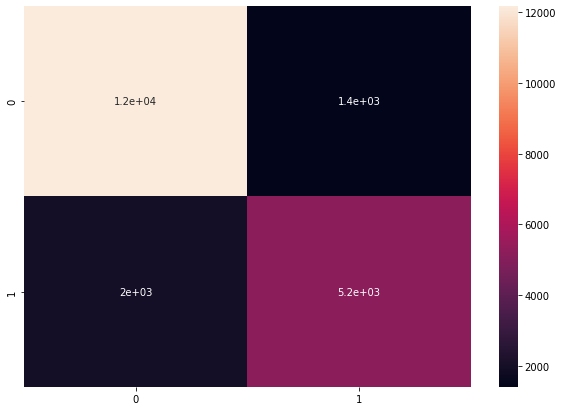

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(matrix, annot=True)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
matrix_3 = classification_report(actual,predicted,labels=[0,1], output_dict=True)
print('Classification report : \n',matrix_3)
accuracy_score(actual, predicted)

Classification report : 
 {'0': {'precision': 0.860121571953633, 'recall': 0.8964272559852671, 'f1-score': 0.8778992172564296, 'support': 13575}, '1': {'precision': 0.7860620815581254, 'recall': 0.7230230930720783, 'f1-score': 0.7532259240358679, 'support': 7145}, 'accuracy': 0.8366312741312741, 'macro avg': {'precision': 0.8230918267558792, 'recall': 0.8097251745286727, 'f1-score': 0.8155625706461487, 'support': 20720}, 'weighted avg': {'precision': 0.8345832003862632, 'recall': 0.8366312741312741, 'f1-score': 0.8349073890681616, 'support': 20720}}


0.8366312741312741

In [ ]:
matrix_df = pd.DataFrame(matrix).transpose()
matrix_3_df = pd.DataFrame(matrix_3).transpose()
# matrix_df.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/conf_matrix_transf_learn_3_convs_last_fc_retrain_2.csv", header=False, index=False)
# matrix_3_df.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/classification_report_transf_learn_3_convs_last_fc_retrain_2.csv", header=False, index=False)

# pd.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/classification_report.txt",matrix)
